# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

import json

from sklearn.feature_selection import mutual_info_classif

from collections import defaultdict

from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
path_to_save = './../results/03d_features_analysis'

# Loading data

In [4]:
path_to_ftir_data_3800_2500 = './../data/processed_data/dataset_3800_2500_engineered.csv'
path_to_ftir_data_1900_800 = './../data/processed_data/dataset_1900_800_engineered.csv'

path_to_features_description_3800_2500 = './../data/processed_data/features_description_3800_2500.json'
path_to_features_description_1900_800 = './../data/processed_data/features_description_1900_800.json'

## FTIR-features (*long-list*)

In [5]:
dataset_3800_2500 = pd.read_csv(path_to_ftir_data_3800_2500, sep=';', index_col=0)

print(dataset_3800_2500.shape)
dataset_3800_2500.head(3)

(75, 49)


$I_{2928}$  $I_{3355}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                      0.494443   
division_1_size_5                         0.396989   
division_1_size_3                         0.581733   

                      $\overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                      0.982242   
division_1_size_5                         0.982472   
division_1_size_3                         0.981591   

                      $\overline{I}_{3725 \pm 50}$  $\log I_{2928}$  \
division_1_size_bulk                      0.075964        -0.709847   
division_1_size_5                         0.035765        -0.899098   
division_1_size_3                         0.067710        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3355}$  $(I_{3355})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                          -0.704324   
division_1_size_5                             -0.923846   
division_1_size_3                             -0.541743   

                      $(\overline{I}_{2928 \pm 50})^{-1}$  \
division_1_size_bulk                             2.022478   
division_1_size_5                                2.518960   
division_1_size_3                                1.719000   

                      $\log \overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                          -0.017917   
division_1_size_5                             -0.017684   
division_1_size_3                             -0.018581   

                      $(\overline{I}_{3355 \pm 50})^{-1}$  \
division_1_size_bulk                             1.018079   
division_1_size_5                                1.017841   
division_1_size_3                                1.018755   

                      

In [6]:
dataset_1900_800 = pd.read_csv(path_to_ftir_data_1900_800, sep=';', index_col=0)

print(dataset_1900_800.shape)
dataset_1900_800.head(3)

(75, 324)


$I_{873}$  $I_{1105}$  $I_{1241}$  $I_{1394}$  \
division_1_size_bulk   0.048208    0.681294    0.455066    0.760582   
division_1_size_5      0.091875    0.606138    0.427988    0.687458   
division_1_size_3      0.110321    0.836176    0.400950    0.696553   

                      $I_{1615}$  $I_{1726}$  \
division_1_size_bulk         1.0    0.421995   
division_1_size_5            1.0    0.383362   
division_1_size_3            1.0    0.366658   

                      $\overline{I}_{1900\text{–}800}$  \
division_1_size_bulk                          0.424162   
division_1_size_5                             0.378730   
division_1_size_3                             0.436266   

                      $\Sigma I_{p,\ 1900\text{–}800}$  \
division_1_size_bulk                          3.367146   
division_1_size_5                             3.196821   
division_1_size_3                             3.410658   

                      $\overline{I}_{1900\text{–}1500}$  \
division_1_size_bulk                           0.426619   
division_1_size_5                              0.378004   
division_1_size_3                              0.429362   

                      $\Sigma I_{p,\ 1900\text{–}1500}$  \
division_1_size_bulk                           1.421995   
division_1_size_5                              1.383362   
division_1_size_3                              1.366658   

                      $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk                           0.571735   
division_1_size_5                              0.502368   
division_1_size_3                              0.523513   

                      $\Sigma I_{p,\ 1500\text{–}1300}$  \
division_1_size_bulk                           0.760582   
division_1_size_5                              0.687458   
division_1_size_3                              0.696553   

                      $\overline{I}_{1300\text{–}800}$  \
division_1_size_bulk                          0.363338   
division_1_size_5                             0.329999   
division_1_size_3                             0.406988   

                      $\Sigma I_{p,\ 1300\text{–}800}$  \
division_1_size_bulk                          1.184569   
division_1_size_5                             1.126001   
division_1_size_3                             1.347446   

                      $\overline{I}_{873 \pm 25}$  \
division_1_size_bulk                     0.047543   
division_1_size_5                        0.093349   
division_1_size_3                        0.113396   

                      $\overline{I}_{873 \pm 50}$  \
division_1_size_bulk                     0.047916   
division_1_size_5                        0.096086   
division_1_size_3                        0.114054   

                      $\overline{I}_{1105 \pm 25}$  \
division_1_size_bulk                      0.628121   
division_1_size_5                         0.593910   
division_1_size_3                         0.816077   

                      $\overline{I}_{1105 \pm 50}$  \
division_1_size_bulk                      0.615327   
division_1_size_5                         0.562713   
division_1_size_3                         0.774107   

                      $\overline{I}_{1241 \pm 25}$  \
division_1_size_bulk                      0.447733   
division_1_size_5                         0.424918   
division_1_size_3                         0.401435   

                      $\overline{I}_{1241 \pm 50}$  \
division_1_size_bulk                      0.442677   
division_1_size_5                         0.421892   
division_1_size_3                         0.409080   

                      $\overline{I}_{1394 \pm 25}$  \
division_1_size_bulk                      0.738860   
division_1_size_5                         0.667947   
division_1_size_3                         0.678774   

                      $\overline{I}_{1394 \pm 50}$  \
division_1_size_bulk                      0.689531   
division_1_size_5                         0.6

## Features description

In [7]:
with open(path_to_features_description_3800_2500, 'r', encoding='utf-8') as f:
    features_description_3800_2500 = json.load(f)

In [8]:
with open(path_to_features_description_1900_800, 'r', encoding='utf-8') as f:
    features_description_1900_800 = json.load(f)

# Data wrangling

## Merging dataframes and dicts

In [9]:
data = pd.merge(
    left=dataset_3800_2500.loc[:, ~dataset_3800_2500.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])],
    right=dataset_1900_800,
    left_index=True,
    right_index=True
)

print(data.shape)
data.head(3)

(75, 369)


$I_{2928}$  $I_{3355}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                      0.494443   
division_1_size_5                         0.396989   
division_1_size_3                         0.581733   

                      $\overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                      0.982242   
division_1_size_5                         0.982472   
division_1_size_3                         0.981591   

                      $\overline{I}_{3725 \pm 50}$  $\log I_{2928}$  \
division_1_size_bulk                      0.075964        -0.709847   
division_1_size_5                         0.035765        -0.899098   
division_1_size_3                         0.067710        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3355}$  $(I_{3355})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                          -0.704324   
division_1_size_5                             -0.923846   
division_1_size_3                             -0.541743   

                      $(\overline{I}_{2928 \pm 50})^{-1}$  \
division_1_size_bulk                             2.022478   
division_1_size_5                                2.518960   
division_1_size_3                                1.719000   

                      $\log \overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                          -0.017917   
division_1_size_5                             -0.017684   
division_1_size_3                             -0.018581   

                      $(\overline{I}_{3355 \pm 50})^{-1}$  \
division_1_size_bulk                             1.018079   
division_1_size_5                                1.017841   
division_1_size_3                                1.018755   

                      

In [10]:
features_description = {}

for d in (features_description_3800_2500, features_description_1900_800):
    for k, v in d.items():
        features_description.setdefault(k, []).extend(v)

print(features_description.keys())

dict_keys(['base_features_peaks_3800_2500', 'base_features_intervals_3800_2500', 'engineered_features_peaks_3800_2500', 'engineered_features_intervals_3800_2500', 'base_features', 'engineered_features', 'base_features_peaks_1900_800', 'base_features_intervals_1900_800', 'engineered_features_peaks_1900_800', 'engineered_features_intervals_1900_800'])


## Base parameters

In [11]:
features_df = data.loc[:, ~data.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])]

print(features_df.shape)
features_df.head(3)

(75, 365)


$I_{2928}$  $I_{3355}$  $I_{3725}$  \
division_1_size_bulk    0.491720         1.0    0.088957   
division_1_size_5       0.406937         1.0    0.028525   
division_1_size_3       0.618445         1.0    0.079233   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.580676   
division_1_size_5                              1.435462   
division_1_size_3                              1.697678   

                      $\overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                      0.494443   
division_1_size_5                         0.396989   
division_1_size_3                         0.581733   

                      $\overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                      0.982242   
division_1_size_5                         0.982472   
division_1_size_3                         0.981591   

                      $\overline{I}_{3725 \pm 50}$  $\log I_{2928}$  \
division_1_size_bulk                      0.075964        -0.709847   
division_1_size_5                         0.035765        -0.899098   
division_1_size_3                         0.067710        -0.480547   

                      $(I_{2928})^{-1}$  $\log I_{3355}$  $(I_{3355})^{-1}$  \
division_1_size_bulk           2.033679              0.0                1.0   
division_1_size_5              2.457385              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3725}$  $(I_{3725})^{-1}$  \
division_1_size_bulk        -2.419606          11.241429   
division_1_size_5           -3.556968          35.056730   
division_1_size_3           -2.535360          12.620970   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.457853   
division_1_size_5                                   0.361487   
division_1_size_3                                   0.529262   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.632641   
division_1_size_5                                     0.696640   
division_1_size_3                                     0.589040   

                      $\log \overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                          -0.704324   
division_1_size_5                             -0.923846   
division_1_size_3                             -0.541743   

                      $(\overline{I}_{2928 \pm 50})^{-1}$  \
division_1_size_bulk                             2.022478   
division_1_size_5                                2.518960   
division_1_size_3                                1.719000   

                      $\log \overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                          -0.017917   
division_1_size_5                             -0.017684   
division_1_size_3                             -0.018581   

                      $(\overline{I}_{3355 \pm 50})^{-1}$  \
division_1_size_bulk                             1.018079   
division_1_size_5                                1.017841   
division_1_size_3                                1.018755   

                      

In [12]:
hue = data['Fraction_grouped_hue'].tolist()
hue_order = sorted(set(hue))

target = data['Class'].tolist()

In [13]:
type_color_dict = {
    '$0< d \leq 2$': '#2166AC',
    '$2 < d \leq 5$': '#67A9CF',
    '$d > 5$': '#B2182B'
}

In [14]:
groups = list(type_color_dict.keys())

In [15]:
feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800',
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

In [16]:
sns.set_theme()

# Features analysis

## Mutual information

In [17]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 18,
    'TITLE_FONTSTYLE': 'normal',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 16,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 16,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 7
}

TITLE_MAP = {
    'peaks_3800_2500': 'Peak-based | 3800–2500 cm$^{-1}$',
    'intervals_3800_2500': 'Region-based | 3800–2500 cm$^{-1}$',
    'peaks_1900_800': 'Peak-based | 1900–800 cm$^{-1}$',
    'intervals_1900_800': 'Region-based | 1900–800 cm$^{-1}$'
}

COLORS = {
    'base': 'RoyalBlue',
    'engineered': 'SeaGreen'
}

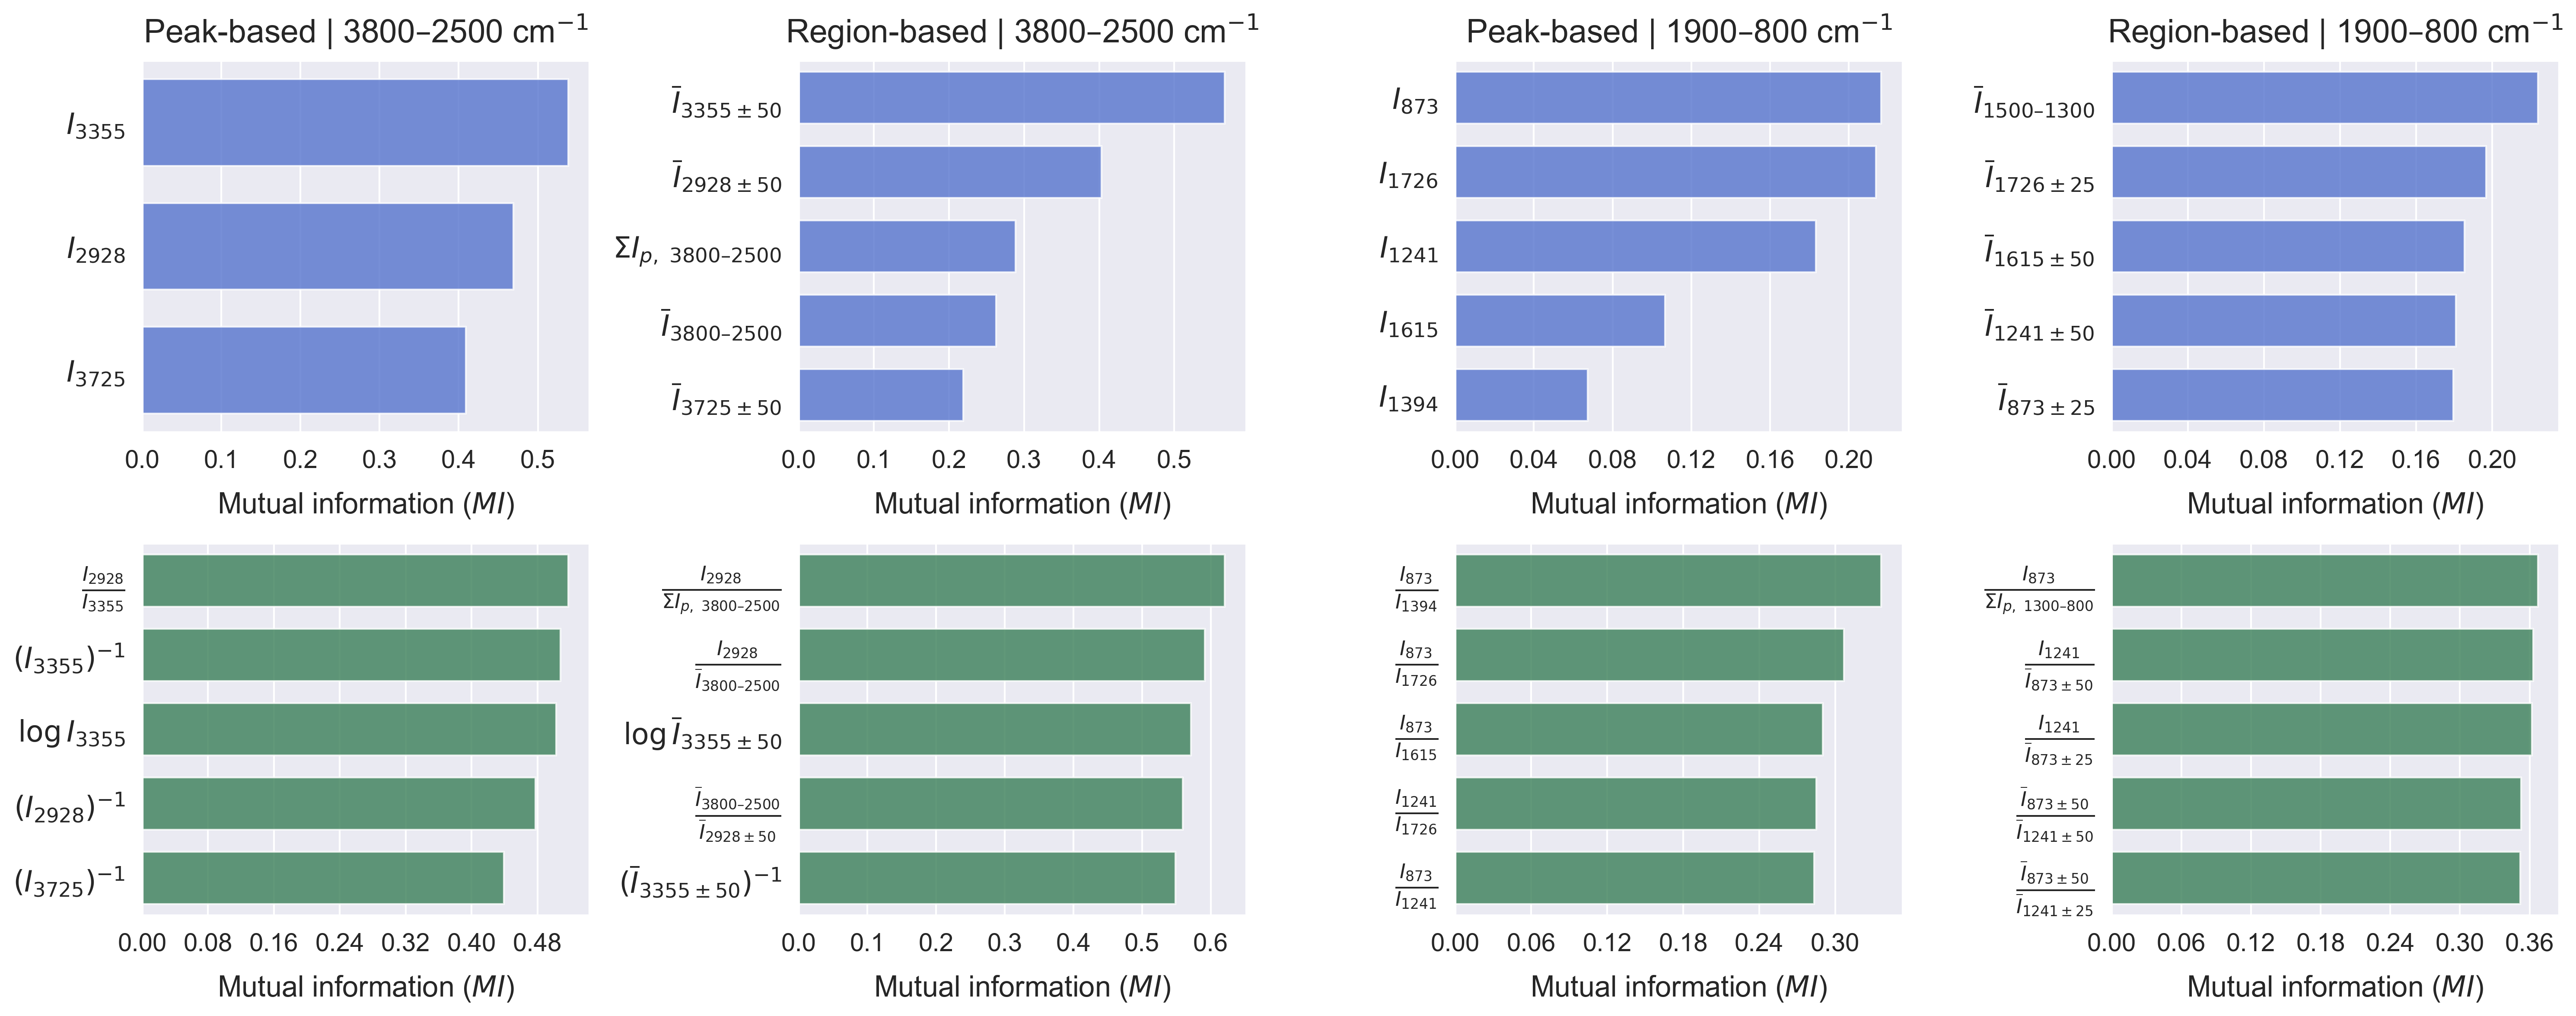

In [18]:
nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4), dpi=300)
axes = axes.flat

for i, feature_type in enumerate(feature_types):
    X_subset = features_df[features_description[feature_type]]
    y_subset = target

    mi = mutual_info_classif(X_subset, y_subset, discrete_features='auto', random_state=42)
    
    result_df = pd.DataFrame({
        'Feature': X_subset.columns,
        'Mutual_Info': mi
    })
    result_df = result_df.sort_values(by='Mutual_Info', ascending=False).head(5)

    ax = axes[i]
    
    kind = 'engineered' if 'engineered' in feature_type else 'base'
    plot_color = COLORS[kind]

    sns.barplot(
        data=result_df,
        x='Mutual_Info',
        y='Feature',
        ax=ax,
        color=plot_color,
        width=0.7,
        alpha=0.8
    )

    if i < 4:
        key = '_'.join(feature_type.split('_')[2:])
        ax.set_title(TITLE_MAP[key], fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=10)
        ax.set_xlabel('')
    
    ax.set_xlabel('Mutual information ($MI$)', fontsize=PLOT_STYLE['X_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['X_LABELPAD'])

    ax.set_ylabel('', fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])
    
    ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
    ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/mutual_info_barplots.svg')

plt.show()

## Visualization (BoxPlot & ViolinPlot)

In [19]:
base_feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800'
]

engineered_feature_types = [
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

### Function for sorting by *MS*

In [20]:
def get_ranked_features_by_mutual_info(features_df, target, features_description, feature_types):
    results_lst = []
    
    for feature_type in feature_types:
        X = features_df[features_description[feature_type]]
        mi = mutual_info_classif(X, target, discrete_features='auto', random_state=42)
        
        data = pd.DataFrame({
            'Feature': X.columns,
            'Mutual_Info': mi,
            'Feature_Type': feature_type
        })
        data = data.sort_values('Mutual_Info', ascending=False).reset_index(drop=True)
        
        results_lst.append(data)

    result_data = pd.concat(results_lst, ignore_index=True)
    return result_data

### *Base* features

#### Ranking features

In [21]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=base_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(34, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3355}$     0.538480  base_features_peaks_3800_2500
1  $I_{2928}$     0.468834  base_features_peaks_3800_2500
2  $I_{3725}$     0.409163  base_features_peaks_3800_2500

In [22]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3355}$     0.538480  base_features_peaks_3800_2500
1  $I_{2928}$     0.468834  base_features_peaks_3800_2500
2  $I_{3725}$     0.409163  base_features_peaks_3800_2500

In [23]:
top_features = top_features_df['Feature']

#### Data preparation

In [24]:
df_vis = features_df[top_features].copy()

df_vis['target'] = target

desired_order = ['$d \\leq 2$', '$2 < d \\leq 5$', '$d > 5$']
df_vis['hue'] = hue
df_vis['hue'] = pd.Categorical(df_vis['hue'], categories=desired_order, ordered=True)

print(df_vis.shape)
df_vis.head(3)

(75, 14)


$I_{3355}$  $I_{2928}$  $I_{3725}$  \
division_1_size_bulk         1.0    0.491720    0.088957   
division_1_size_5            1.0    0.406937    0.028525   
division_1_size_3            1.0    0.618445    0.079233   

                      $\overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                      0.982242   
division_1_size_5                         0.982472   
division_1_size_3                         0.981591   

                      $\overline{I}_{2928 \pm 50}$  \
division_1_size_bulk                      0.494443   
division_1_size_5                         0.396989   
division_1_size_3                         0.581733   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  $I_{873}$  \
division_1_size_bulk                           1.580676   0.048208   
division_1_size_5                              1.435462   0.091875   
division_1_size_3                              1.697678   0.110321   

                      $I_{1726}$  $I_{1241}$  \
division_1_size_bulk    0.421995    0.455066   
division_1_size_5       0.383362    0.427988   
division_1_size_3       0.366658    0.400950   

                      $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk                           0.571735   
division_1_size_5                              0.502368   
division_1_size_3                              0.523513   

                      $\overline{I}_{1726 \pm 25}$  \
division_1_size_bulk                      0.415802   
division_1_size_5                         0.376555   
division_1_size_3                         0.366774   

                      $\overline{I}_{1615 \pm 50}$  target             hue  
division_1_size_bulk                      0.845640       2         $d > 5$  
division_1_size_5                         0.831352       1  $2 < d \leq 5$  
division_1_size_3                         0.877520       1  $2 < d \leq 5$

In [25]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [26]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

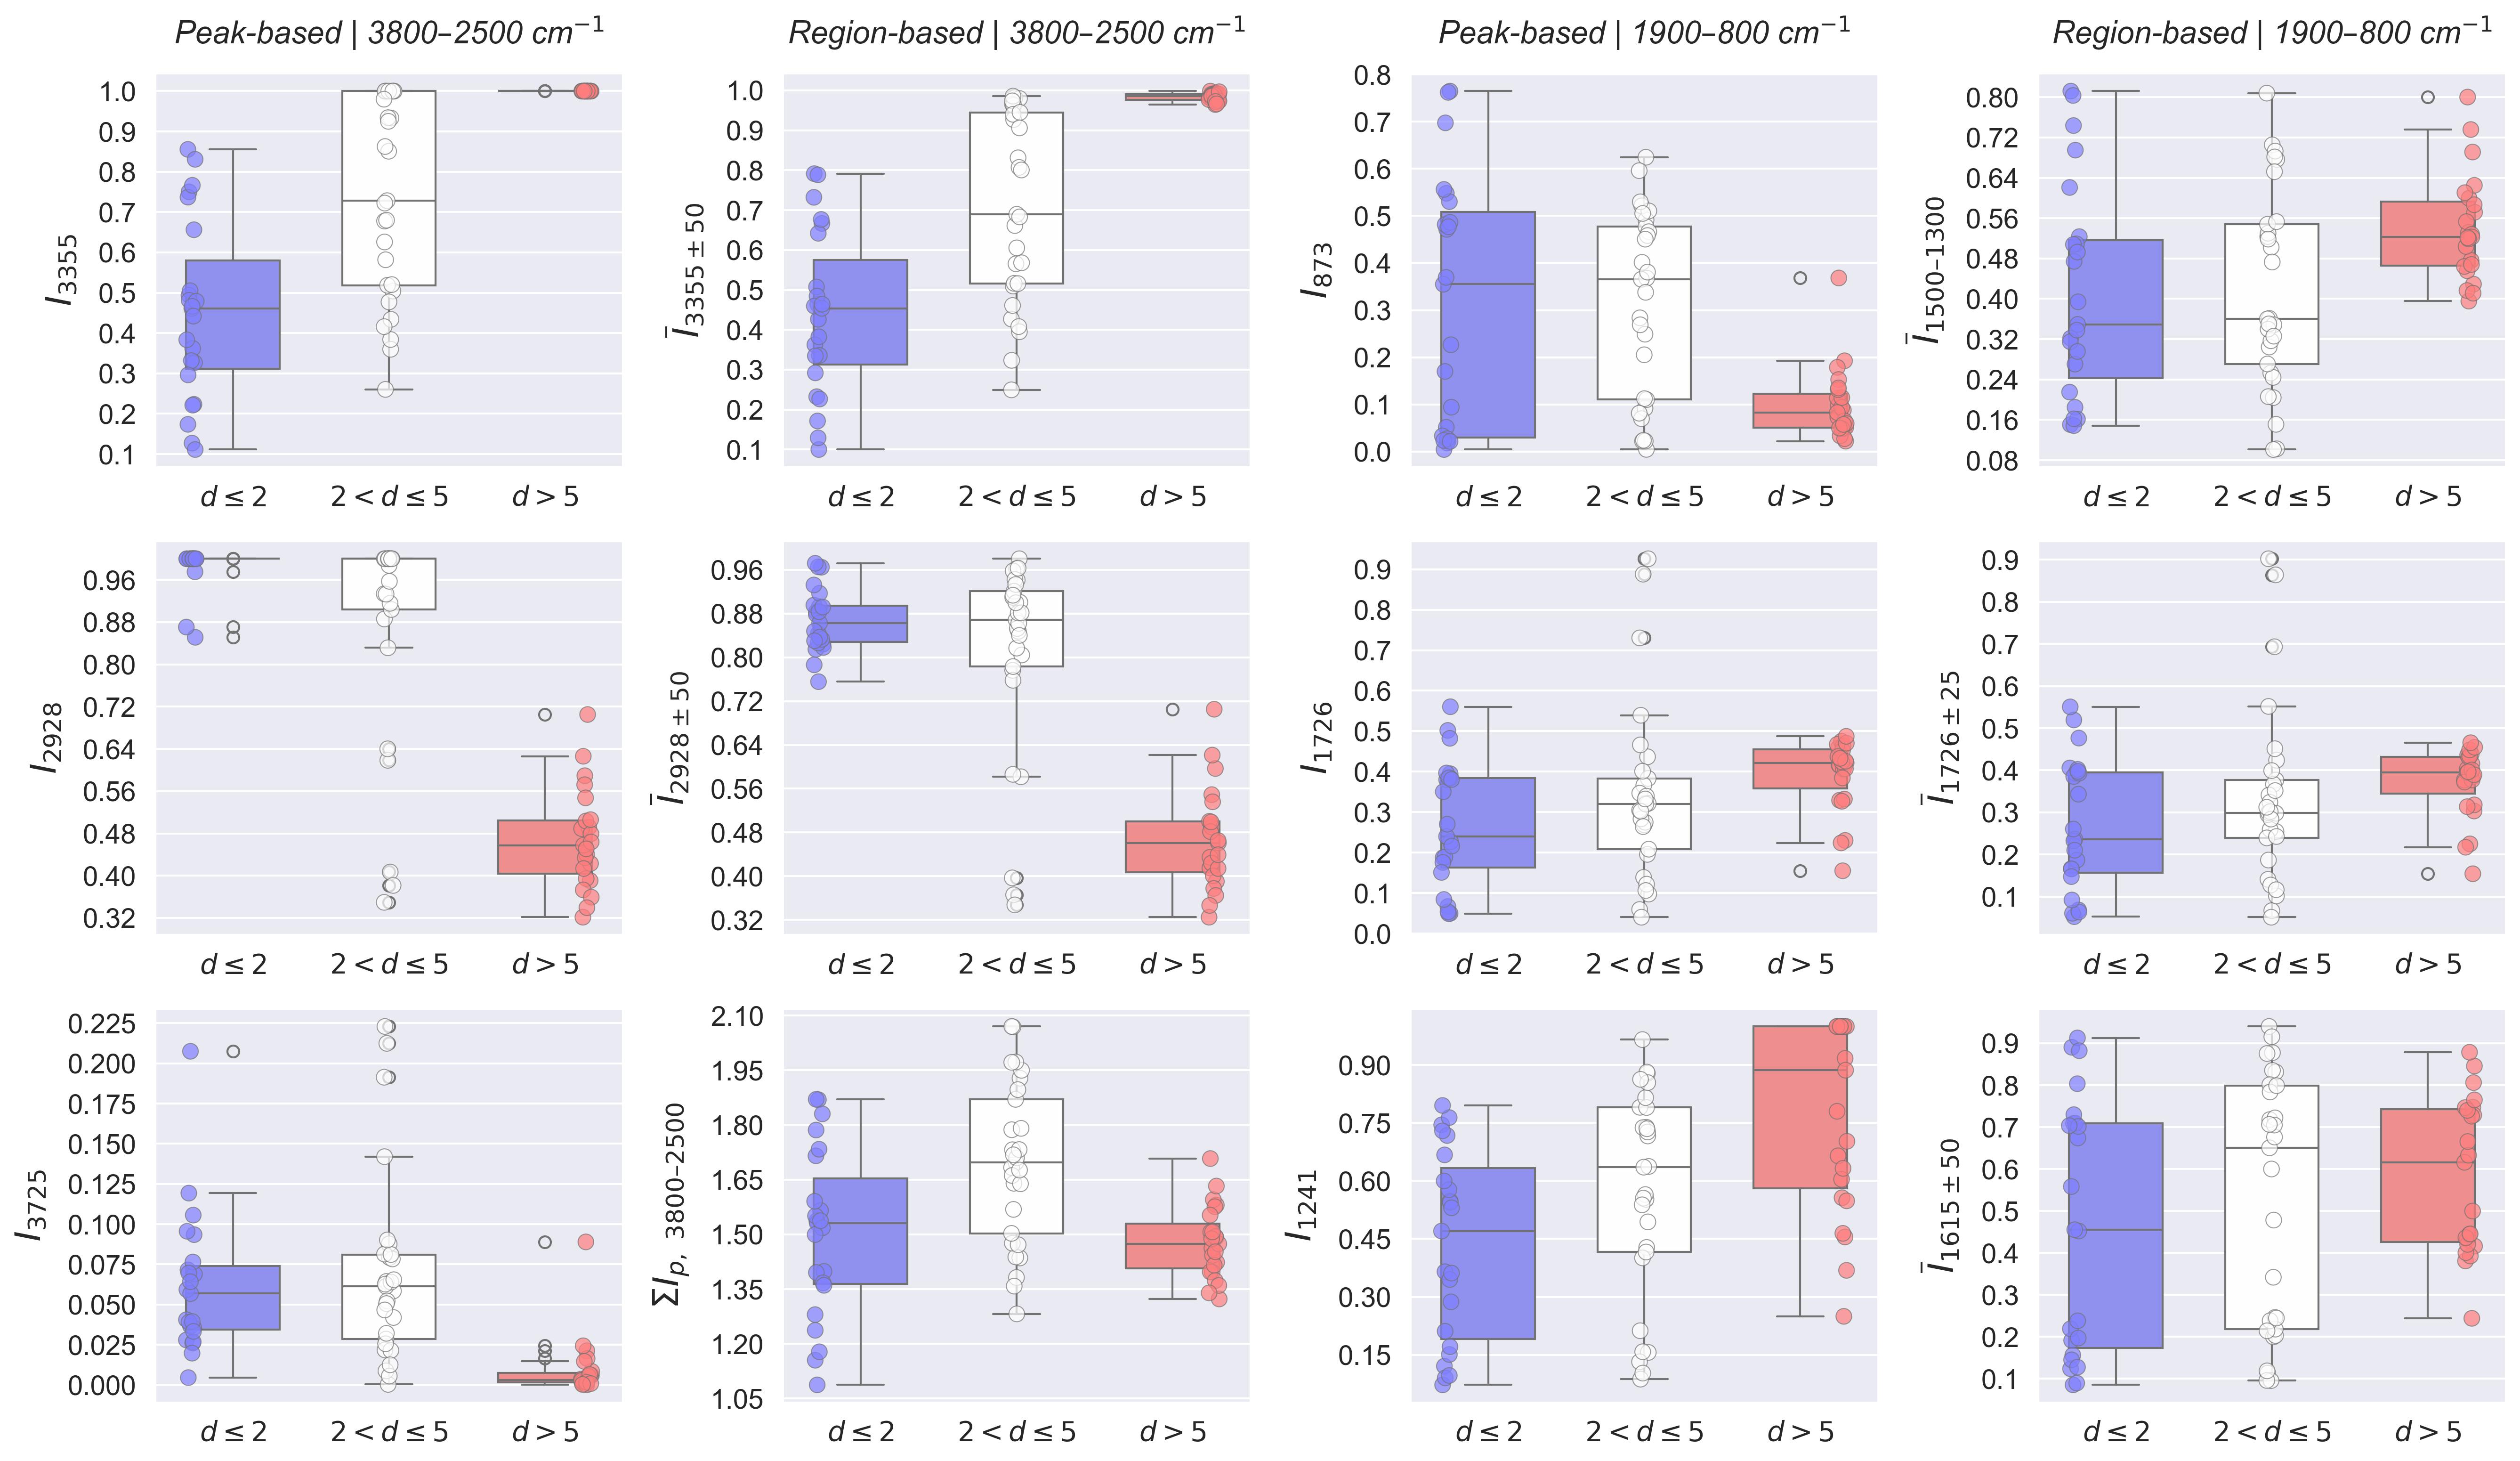

In [27]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_base_features.svg')

plt.show()

#### Violin plot

In [28]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box',  # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}


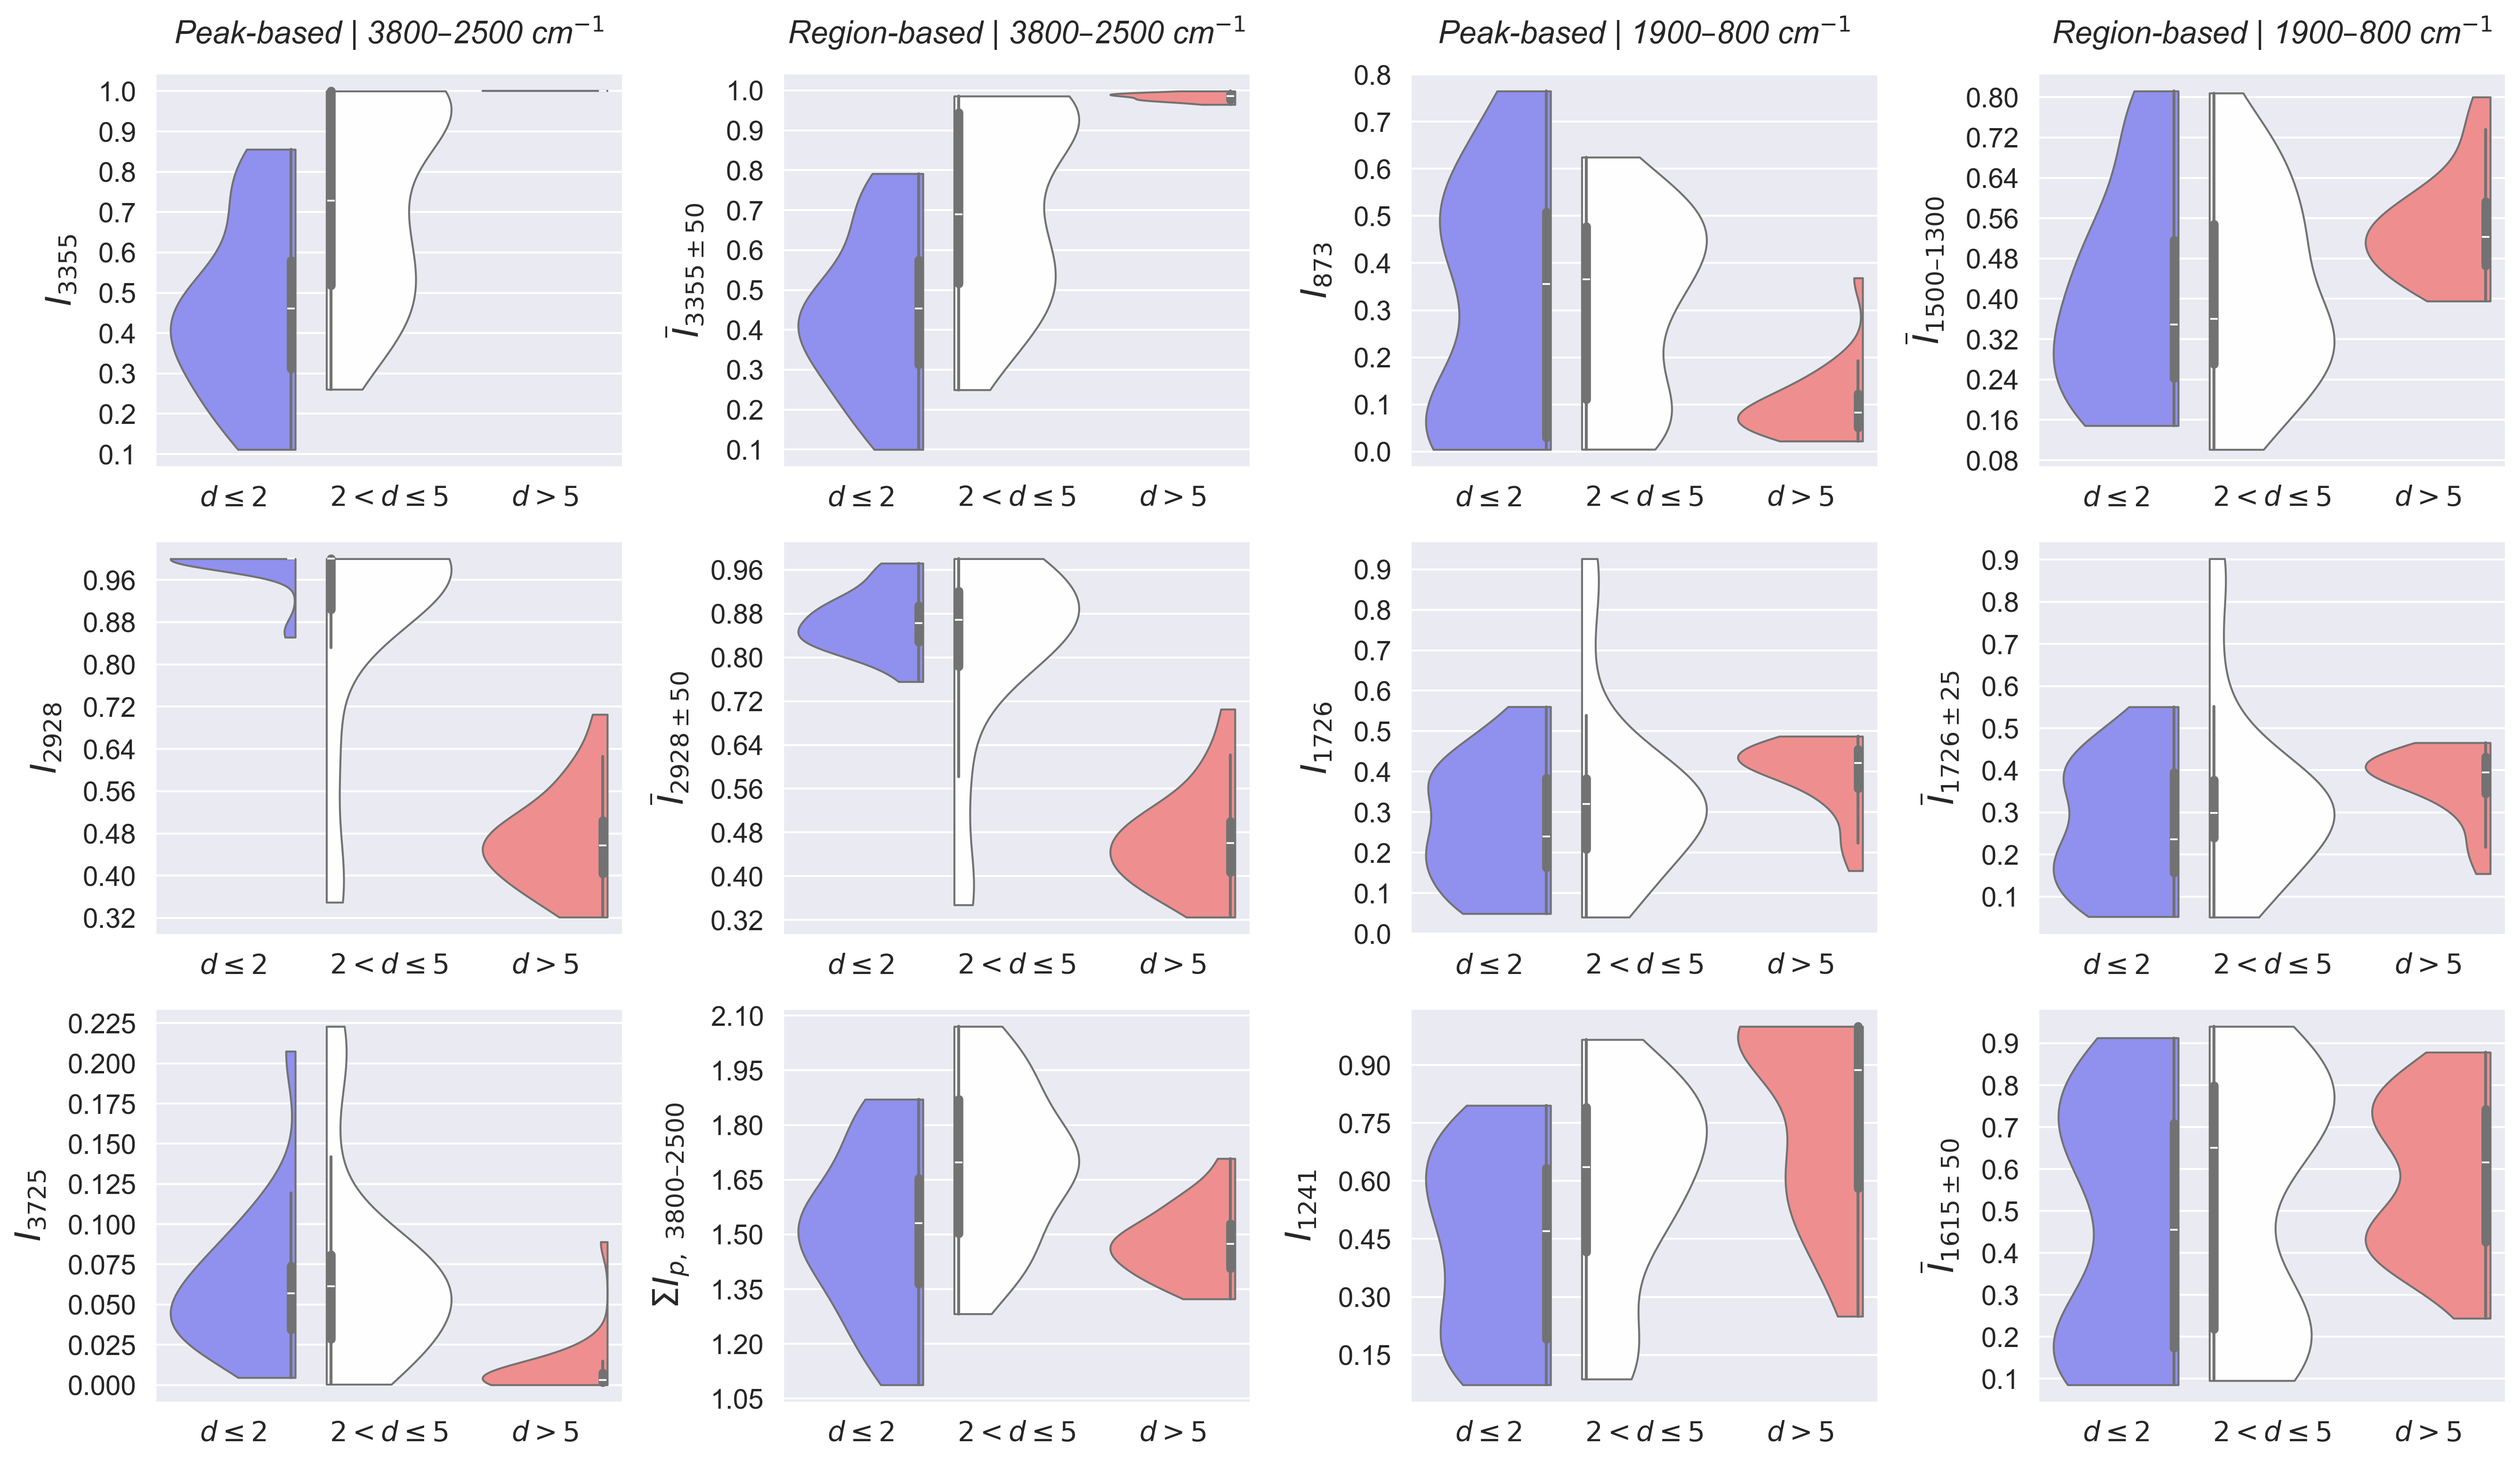

In [29]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_base_features.svg')

plt.show()

### *Engineered* features

#### Ranking features

In [30]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=engineered_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(331, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2928}}{I_{3355}}$     0.517411   
1            $(I_{3355})^{-1}$     0.507807   
2              $\log I_{3355}$     0.502659   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [31]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2928}}{I_{3355}}$     0.517411   
1            $(I_{3355})^{-1}$     0.507807   
2              $\log I_{3355}$     0.502659   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [32]:
top_features = top_features_df['Feature']

#### Data preparation

In [33]:
df_vis = features_df[top_features].copy()
df_vis['target'] = target
df_vis['hue'] = hue

print(df_vis.shape)
df_vis.head(3)

(75, 14)


$\frac{I_{2928}}{I_{3355}}$  $(I_{3355})^{-1}$  \
division_1_size_bulk                     0.491720                1.0   
division_1_size_5                        0.406937                1.0   
division_1_size_3                        0.618445                1.0   

                      $\log I_{3355}$  \
division_1_size_bulk              0.0   
division_1_size_5                 0.0   
division_1_size_3                 0.0   

                      $\frac{I_{2928}}{\Sigma I_{p,\ 3800\text{–}2500}}$  \
division_1_size_bulk                                            0.311082   
division_1_size_5                                               0.283488   
division_1_size_3                                               0.364289   

                      $\frac{I_{2928}}{\overline{I}_{3800\text{–}2500}}$  \
division_1_size_bulk                                            0.934471   
division_1_size_5                                               0.851494   
division_1_size_3                                               1.154270   

                      $\log \overline{I}_{3355 \pm 50}$  \
division_1_size_bulk                          -0.017917   
division_1_size_5                             -0.017684   
division_1_size_3                             -0.018581   

                      $\frac{I_{873}}{I_{1394}}$  $\frac{I_{873}}{I_{1726}}$  \
division_1_size_bulk                    0.063384                    0.114239   
division_1_size_5                       0.133645                    0.239657   
division_1_size_3                       0.158381                    0.300882   

                      $\frac{I_{873}}{I_{1615}}$  \
division_1_size_bulk                    0.048208   
division_1_size_5                       0.091875   
division_1_size_3                       0.110321   

                      $\frac{I_{873}}{\Sigma I_{p,\ 1300\text{–}800}}$  \
division_1_size_bulk                                          0.040697   
division_1_size_5                                             0.081594   
division_1_size_3                                             0.081874   

                      $\frac{I_{1241}}{\overline{I}_{873 \pm 50}}$  \
division_1_size_bulk                                      9.497153   
division_1_size_5                                         4.454221   
division_1_size_3                                         3.515446   

                      $\frac{I_{1241}}{\overline{I}_{873 \pm 25}}$  target  \
division_1_size_bulk                                      9.571604       2   
division_1_size_5                                         4.584797       1   
division_1_size_3                                         3.535849       1   

                                 hue  
division_1_size_bulk         $d > 5$  
division_1_size_5     $2 < d \leq 5$  
division_1_size_3     $2 < d \leq 5$

In [34]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [35]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

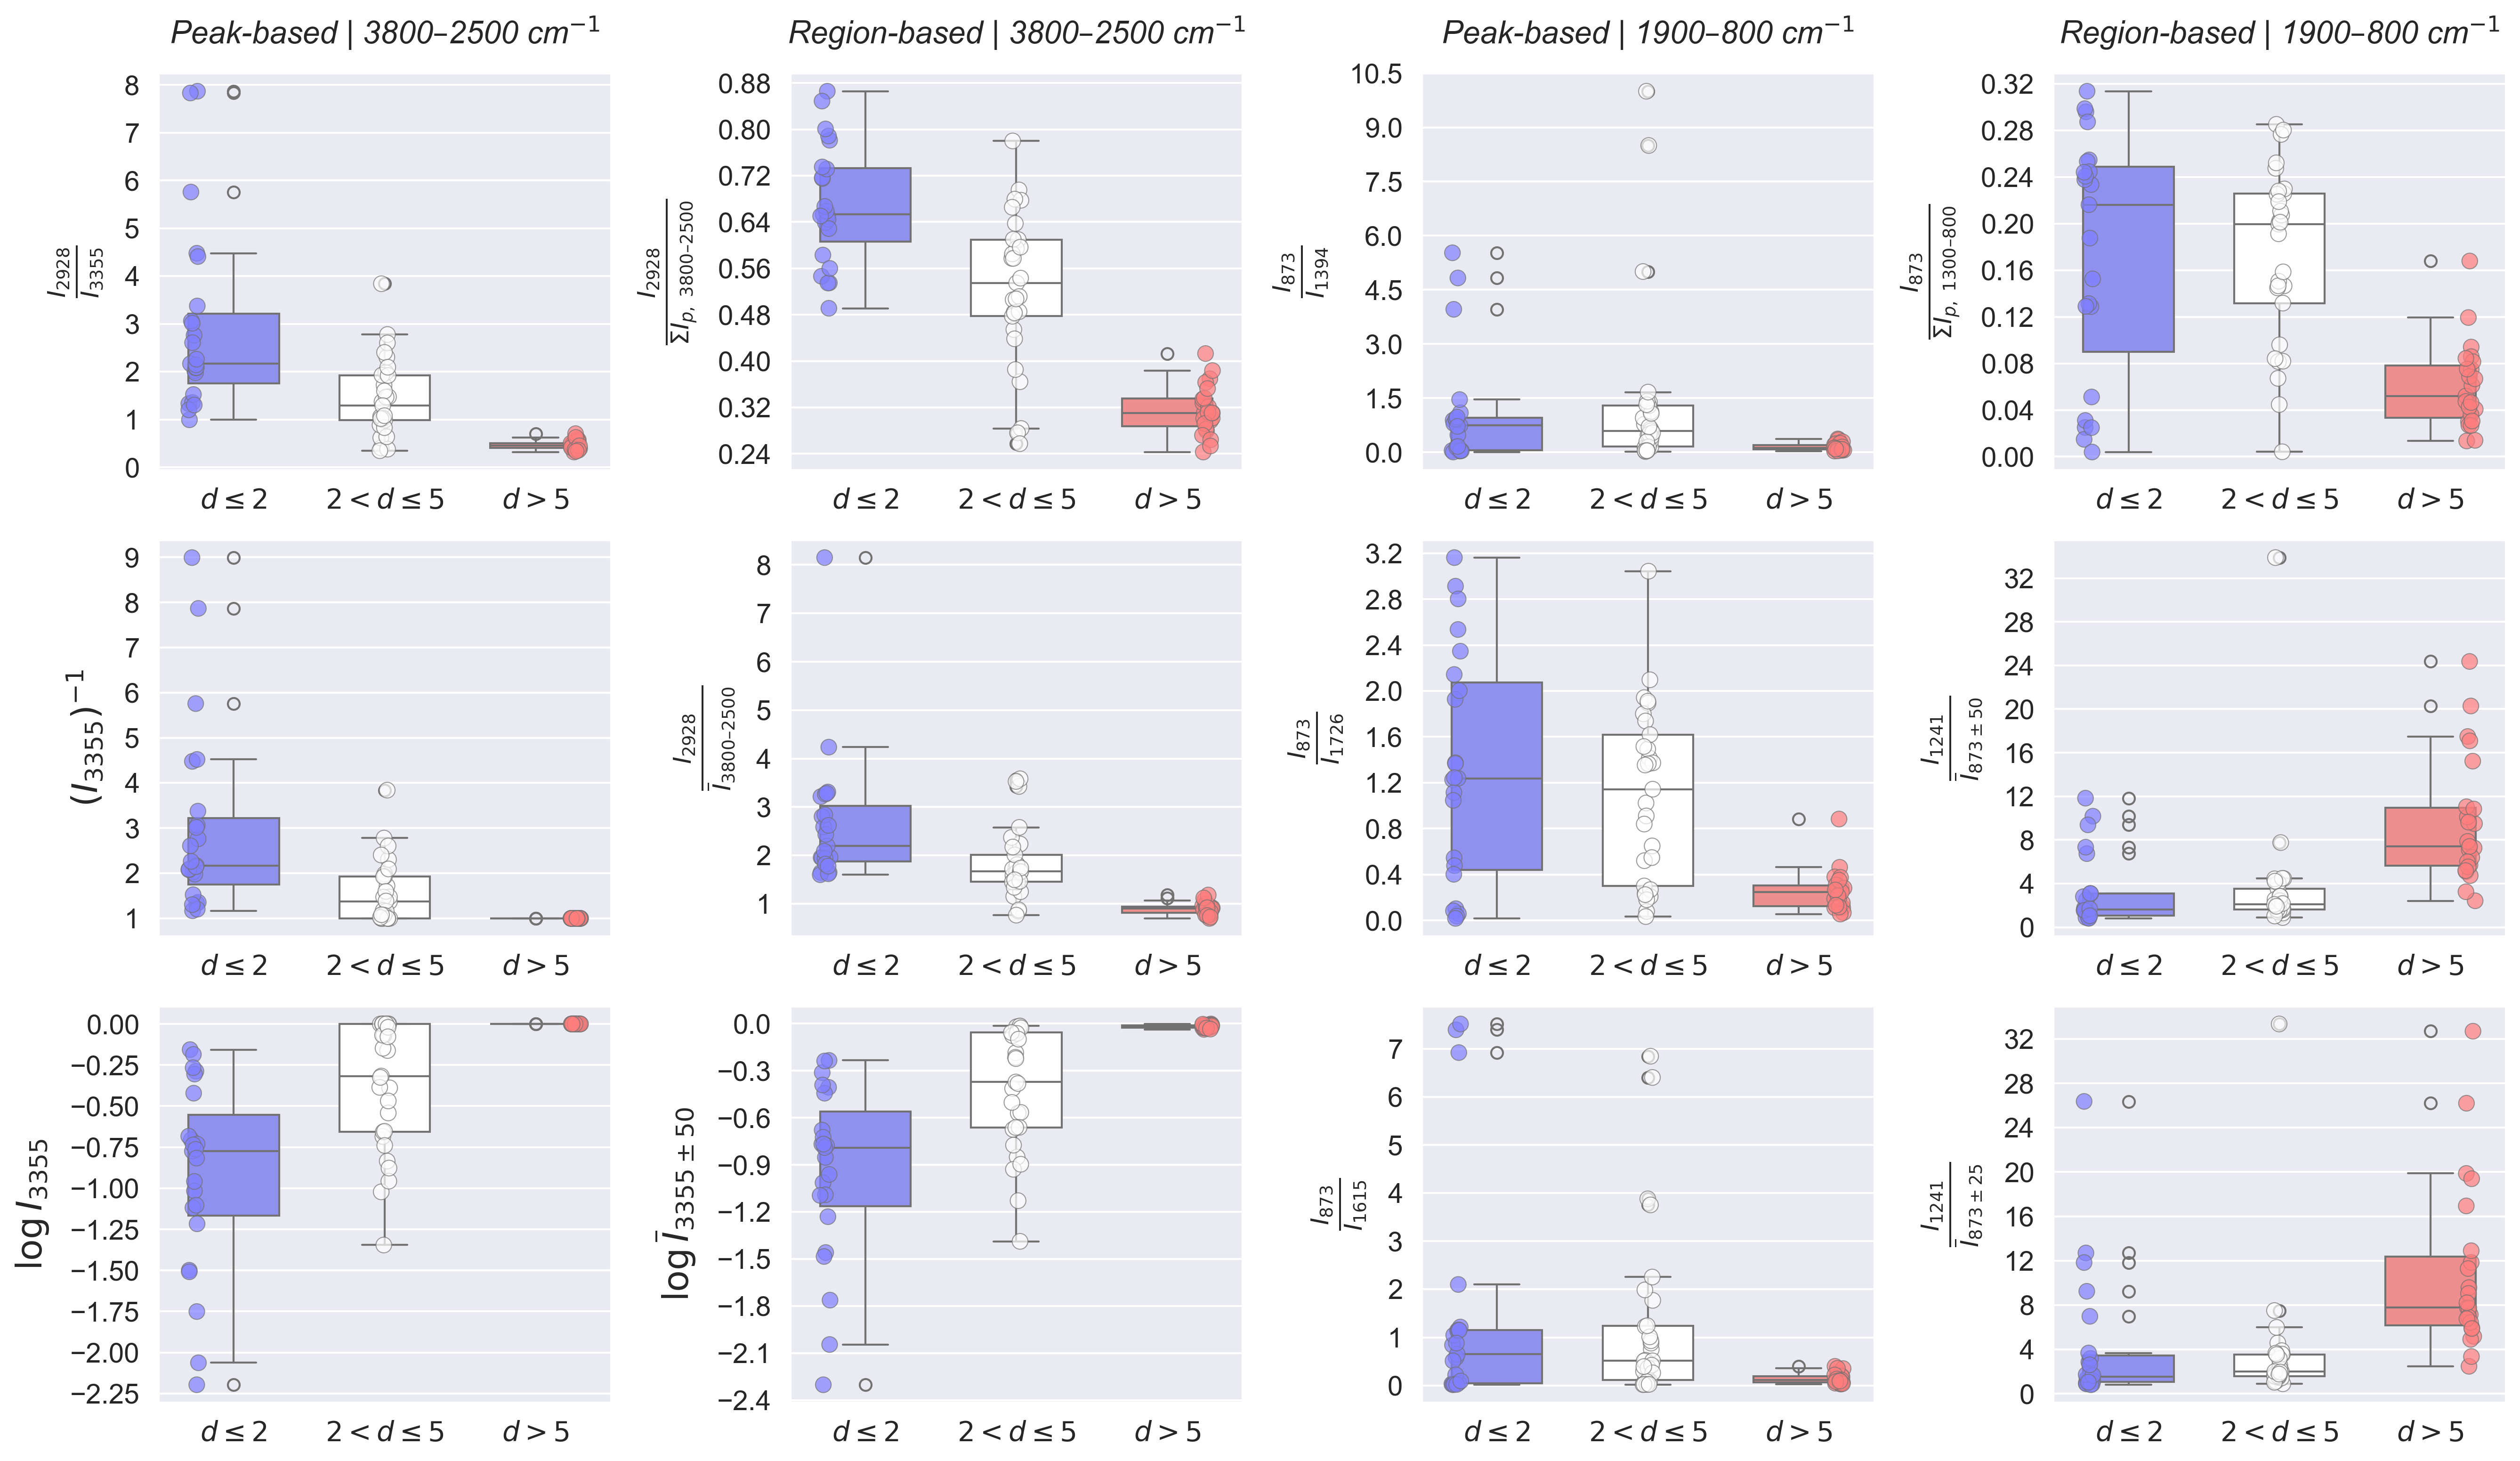

In [36]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_engineered_features.svg')

plt.show()

#### Violin plot

In [37]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box', # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}

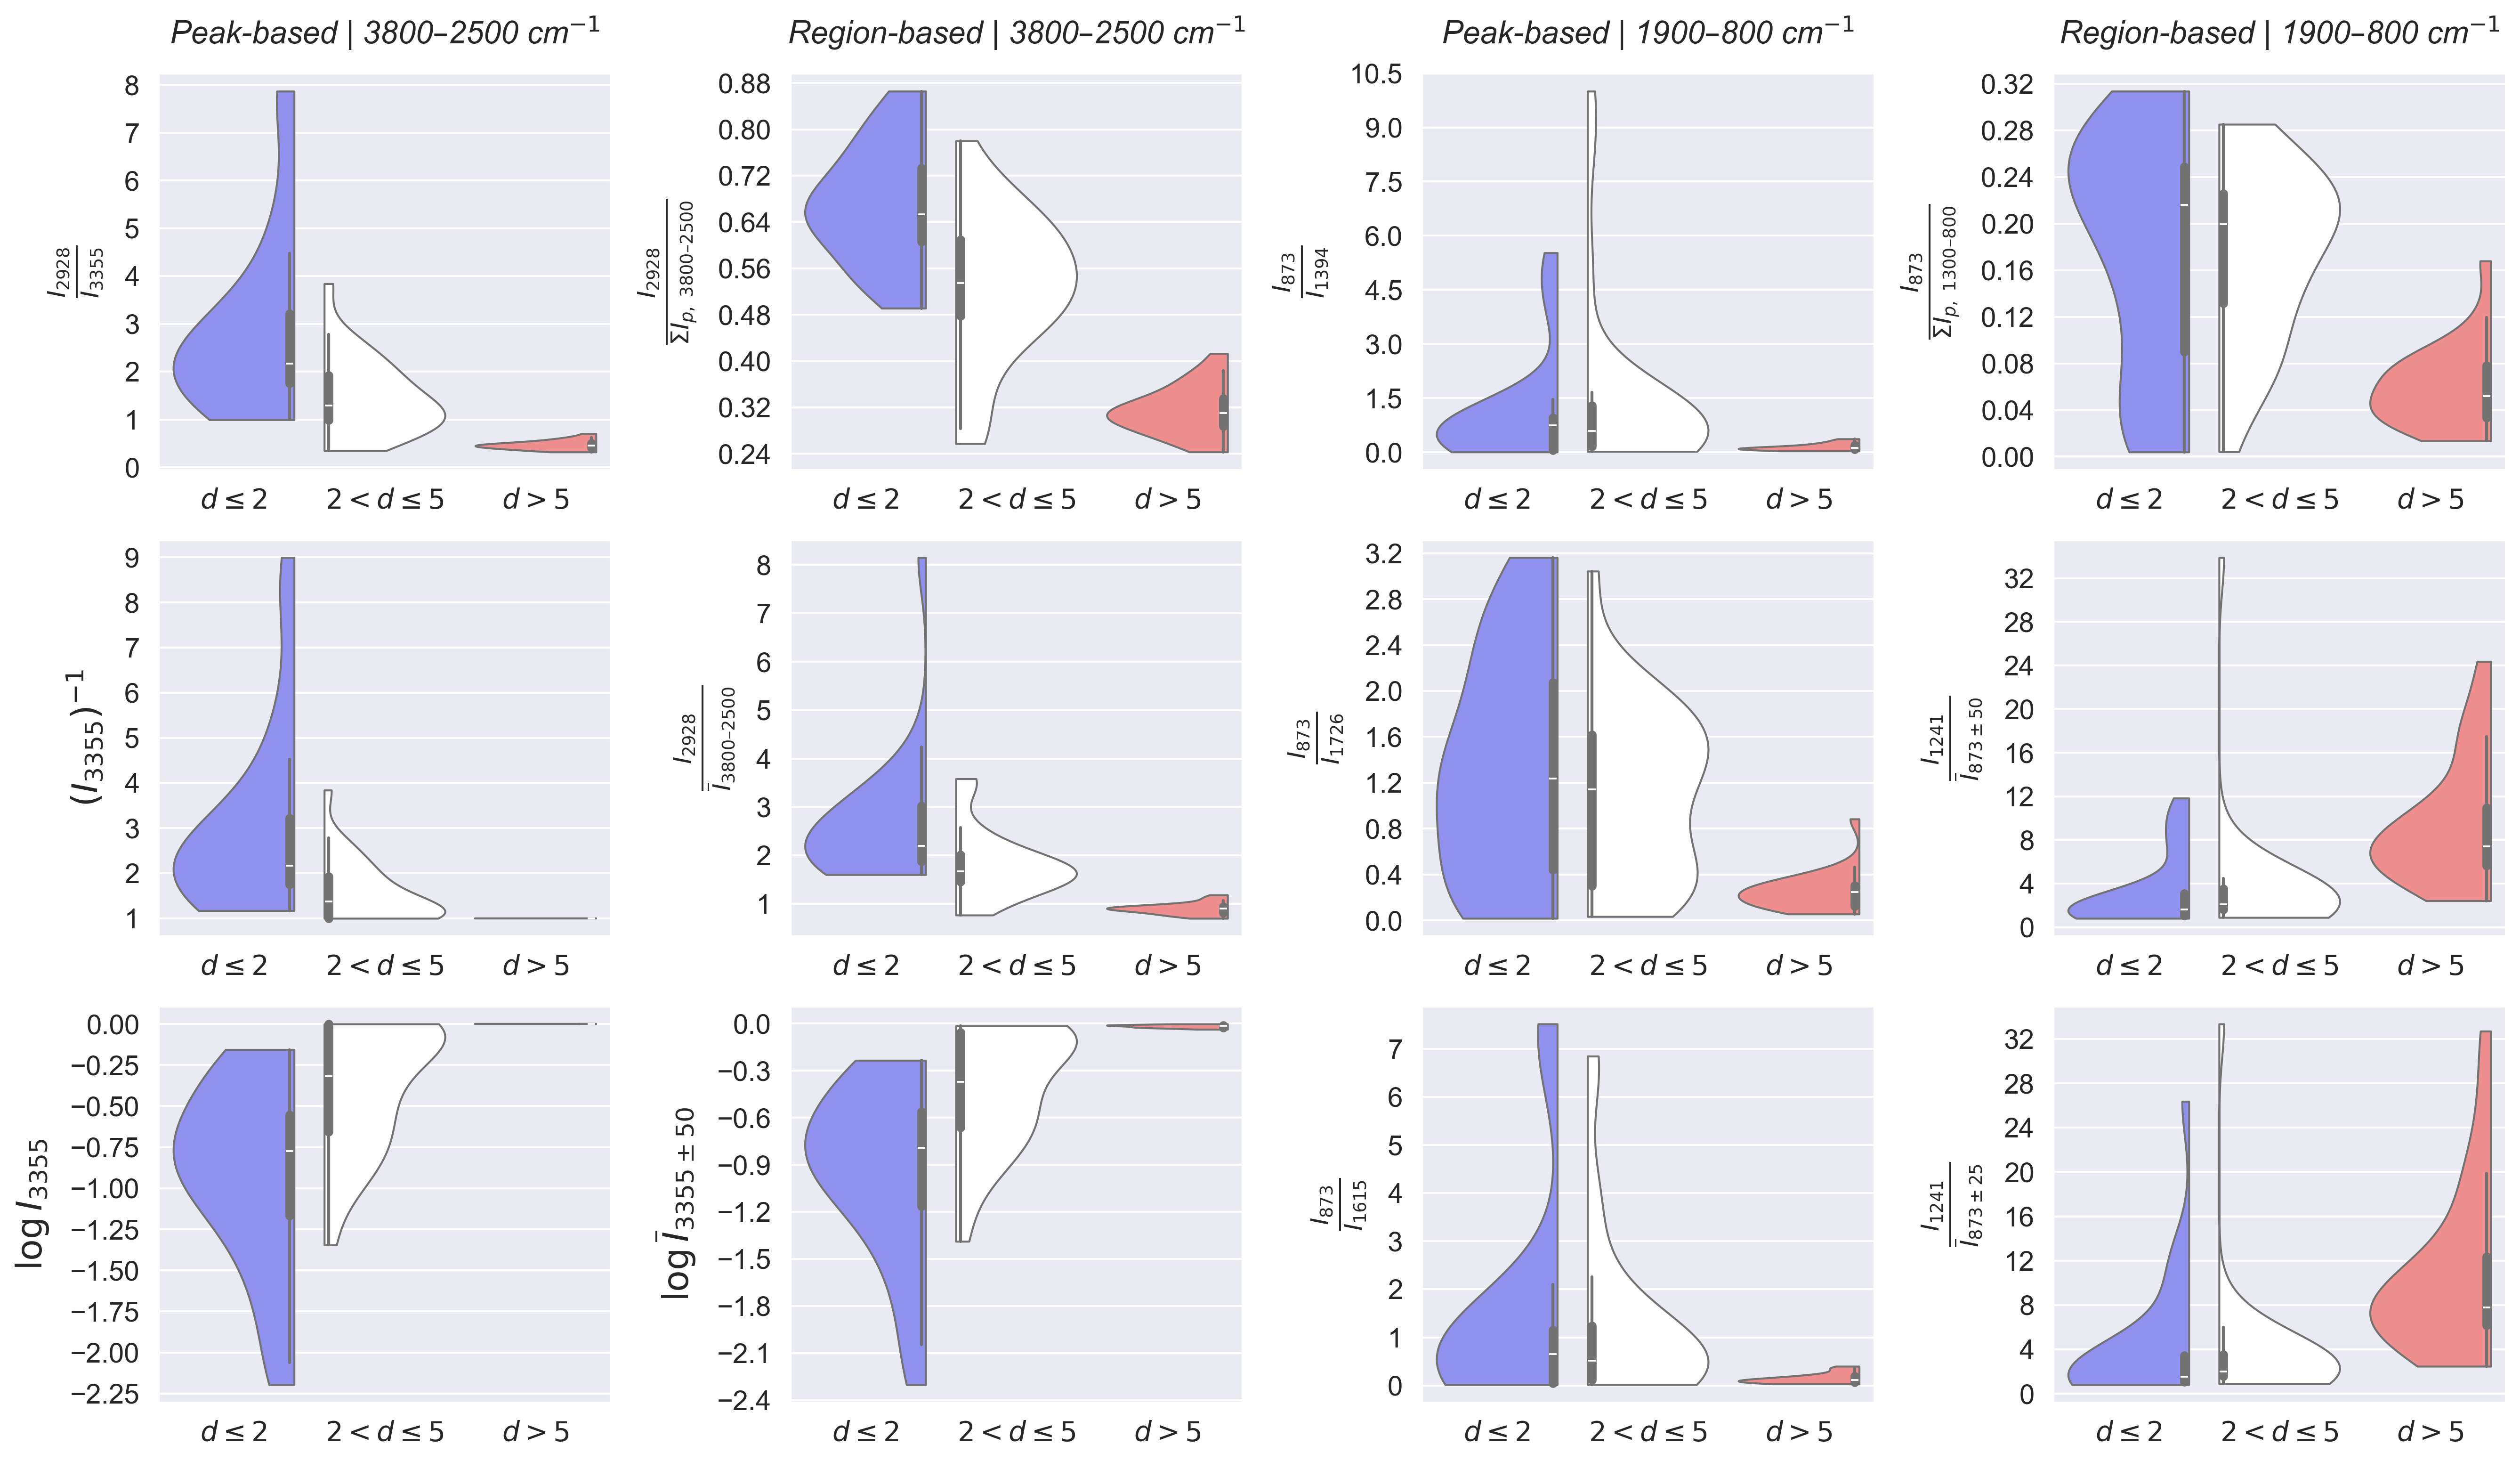

In [38]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_engineered_features.svg')

plt.show()